# Abschlussprojekt

Du arbeitest als Data Scientist bei einer P-2-P-Plattform, die vor einem Jahr gegründet wurde. Nun wollt ihr euer Geschäft erweitern. Euer Team hat sich aufgeteilt und jeder Analyst hat einen Teilbereich der Daten. Deine Aufgabe ist es in einer *explorativen Datenanalyse* Insights für eure Plattform herauszufinden.

Euer Geschäftsmodell ist das Betreiben einer Plattform (crowd-investing) bei der sich Personen die eine Geschäftsidee haben, aber nicht das benötigte Geld, anmelden und für ihr Projekt innerhalb einer vorgegebenen Zeit Geld sammeln können. Auf der anderen Seite habt ihr Geldgeber, die gern ihr Geld in Projekte anlegen möchten und nach Investitionen suchen. Als Vermittler bringt eure Plattform also Geldnehmer und Geldgeber zusammen. Ihr verdient euer Geld mit einer Provision für jedes Projekt was auf eurer Plattform landet.

Deine Datenbasis ist die Historie eurer Plattform. Alle Projekte sind abgeschlossene Projekte, d.h. die Zeit, um für sein Projekt Geld zu sammeln ist abgelaufen. Euer Geschäftsmodell sieht es vor, dass die gesammelten Gelder ausgezahlt werden, auch wenn der Zielbetrag nicht erreicht wurde.

Dafür ist der Datensatz zunächst vorzubereiten. In die Bewertung geht zudem die Dokumentation mit ein. Für die Visualisierung sind 3 verschiedenartige Plots zu benennen, die in die Bewertung eingehen sollen. Das bedeutet nicht, dass du nur 3 Plots ersellen darfst - ausschließlich für die Bewertung sind drei verschiedenartige Plots zu benennen! Vergiss dabei nicht die Erkenntnisse die aus jedem Plot gezogen werden können, zu notieren.

Die Dokumentation kann in englisch oder deutsch erfolgen.

Am Donnerstag erfolgt die Vorstellung der Plots innerhalb des Zeitrahmens von 5min - (+-1min) ist dabei ok.

Treff ist **Mittwoch um 16:00 Uhr im Hauptraum**. Da werden wir die Unterlagen in dokumentensichere Formate umwandeln. Das machen wir aber zusammen. Danach habt ihr bis 17:10 Uhr zeit, eure zu bewertenden Unterlagen in den Projektabgabeordner hochzuladen.


Der gesplittete Datensatz enthält folgende Spalten (inkl. Bedeutung):


    - funded_amount ... mit Ablauf der Crowdfundingzeit erhaltener Betrag/ ausgezahlter Betrag in USD
    - loan_amount ... Zielbetrag (Betrag dem man mit Funding erreichen wollte) in USD
    - activity ... Unterkategory zu dem das Ziel des Crowdfunding thematisch gehört
    - sector ... Oberkategory in den das Crowdfunding Thema fällt
    - use ... Kurzbeschreibung wofür das Geld verwendet werden soll
    - country_code ... Ländercode nach ISO Norm
    - country ... Ländername nach ISO Norm
    - region ... Region
    - currency ... Währung in den der funded_amount dann ausgezahlt wurde
    - term in months ... Dauer über die der Kredit ausgezahlt werden soll
    - lender_count ...Darlehensgeber (also wieviele Personen Geld für das Projekt gegeben haben)
    - borrower_genders ... Geschlecht und Anzahl der Darlehensnehmer, also diejenigen die das Crowdfundingprojekt                                  initiiert haben
    - repayment interval ... Rückzahlungsmodalitäten/-rhythmus


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

##### Part 1

Erste Datensatz "your_part1.csv"

In [2]:
# Erste zwei Zeile lesen um 'sep' Zeichen zu erkennen

df_abschluss_part1 = pd.read_csv("your_part1.csv.", 
                       sep='/n', 
                       engine='python',   
                       nrows=2)           # um zu schauen wie der sep aussieht, die erste zwei Zeilen
df_abschluss_part1 

,", funded_amount, loan_amount, activity, sector, use, country_code, country, region, currency, term_in_months, lender_count, borrower_genders, repayment_interval"
0,"0,300.0,300.0,Fruits & Vegetables,Food,""To buy..."
1,"1,575.0,575.0,Rickshaw,Transportation,to repai..."


In [3]:
# Datensatz mit richtigen Trennzeichen lesen

df_abschluss_part1 = pd.read_csv("your_part1.csv", sep=",")
df_abschluss_part1                                      

,Unnamed: 0,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,term_in_months,lender_count,borrower_genders,repayment_interval
0,0,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,12.0,12,female,irregular
1,1,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,11.0,14,"female, female",irregular
2,2,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,43.0,6,female,bullet
3,3,200.0,200.0,Embroidery,Arts,to purchase an embroidery machine and a variet...,PK,Pakistan,Lahore,PKR,11.0,8,female,irregular
4,4,400.0,400.0,Milk Sales,Food,to purchase one buffalo.,PK,Pakistan,Abdul Hakeem,PKR,14.0,16,female,monthly
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
334995,334995,7125.0,7125.0,Plastics Sales,Retail,to stock up with a dozen plastic tubs and buck...,CD,The Democratic Republic of the Congo,"Goma, North Kivu province",USD,6.0,15,"female, female, female, female, female, female...",irregular
334996,334996,125.0,125.0,Home Appliances,Personal Use,to buy a water filter to provide safe drinking...,KH,Cambodia,Phnom Penh,KHR,8.0,5,"male, male, male",monthly
334997,334997,925.0,925.0,Cattle,Agriculture,to increase his herd to get more milk and prov...,TJ,Tajikistan,Khuroson,TJS,14.0,28,male,monthly
334998,334998,175.0,175.0,General Store,Retail,"to buy additional items to sell, like beverage...",PH,Philippines,"Palo, Leyte",PHP,8.0,6,female,irregular


##### Part 2

Zweite Datensatz "your_part2.csv" 

In [4]:
# Erste zwei Zeile lesen um 'sep' Zeichen zu erkennen

df_abschluss_part2 = pd.read_csv("your_part2.csv.", 
                       sep='/n', 
                       engine='python',   
                       nrows=2)           # um zu schauen wie der sep aussieht, die erste zwei Zeilen
df_abschluss_part2

,# funded_amount# loan_amount# activity# sector# use# country_code# country# region# currency# term_in_months# lender_count# borrower_genders# repayment_interval
0,0#175.0#175.0#Liquor Store / Off-License#Food#...
1,1#325.0#325.0#Livestock#Agriculture#to buy 3 z...


In [5]:
# Datensatz mit richtigen Trennzeichen lesen

df_abschluss_part2 = pd.read_csv("your_part2.csv", sep="#")
df_abschluss_part2

,Unnamed: 0,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,term_in_months,lender_count,borrower_genders,repayment_interval
0,0,175.0,175.0,Liquor Store / Off-License,Food,to purchase additional stock of coconut wine t...,PH,Philippines,"Palo, Leyte",PHP,8.0,6,female,irregular
1,1,325.0,325.0,Livestock,Agriculture,to buy 3 zebus and food to fatten them up.,MG,Madagascar,Antsirabe,MGA,12.0,13,female,monthly
2,2,550.0,550.0,Food Stall,Food,to buy ingredients for her food-vending busine...,PH,Philippines,"Cordova, Cebu",PHP,5.0,6,female,irregular
3,3,1300.0,1300.0,Cattle,Agriculture,to buy one head of cattle.,EG,Egypt,Baniswef,EGP,14.0,50,male,monthly
4,4,900.0,900.0,Consumer Goods,Personal Use,to buy consumer goods amongst others.,PE,Peru,Urubamba - Urubamba - Cusco,PEN,6.0,1,female,irregular
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336200,336200,0.0,25.0,Livestock,Agriculture,"[True, u'para compara: cemento, arenya y ladri...",PY,Paraguay,Concepción,USD,13.0,0,female,monthly
336201,336201,25.0,25.0,Livestock,Agriculture,"[True, u'to start a turducken farm.'] - this l...",KE,Kenya,NaN,KES,13.0,1,female,monthly
336202,336202,0.0,25.0,Games,Entertainment,NaN,KE,Kenya,NaN,KES,13.0,0,NaN,monthly
336203,336203,0.0,25.0,Livestock,Agriculture,"[True, u'to start a turducken farm.'] - this l...",KE,Kenya,NaN,KES,13.0,0,female,monthly


In [6]:
# check länge der daten 

len(df_abschluss_part1) == len(df_abschluss_part2)

False

##### Datensätze zusammenführen durch merge()

In [7]:
# mit merge() beide df´s verbinden

df_abschluss_merge = df_abschluss_part1.merge(df_abschluss_part2, how="outer")
df_abschluss_merge.head()

,Unnamed: 0,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,term_in_months,lender_count,borrower_genders,repayment_interval
0,0,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,12.0,12,female,irregular
1,1,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,11.0,14,"female, female",irregular
2,2,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,43.0,6,female,bullet
3,3,200.0,200.0,Embroidery,Arts,to purchase an embroidery machine and a variet...,PK,Pakistan,Lahore,PKR,11.0,8,female,irregular
4,4,400.0,400.0,Milk Sales,Food,to purchase one buffalo.,PK,Pakistan,Abdul Hakeem,PKR,14.0,16,female,monthly


 Datenlänge Prüfung nicht nötig, da die länge sich ändert durch merge in länge Richtung

In [8]:
df_abschluss_merge.drop_duplicates()       # Doppelte Zeilen mit gleiche Werte auf allen Spalten löschen
df_abschluss_merge

,Unnamed: 0,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,term_in_months,lender_count,borrower_genders,repayment_interval
0,0,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,12.0,12,female,irregular
1,1,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,11.0,14,"female, female",irregular
2,2,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,43.0,6,female,bullet
3,3,200.0,200.0,Embroidery,Arts,to purchase an embroidery machine and a variet...,PK,Pakistan,Lahore,PKR,11.0,8,female,irregular
4,4,400.0,400.0,Milk Sales,Food,to purchase one buffalo.,PK,Pakistan,Abdul Hakeem,PKR,14.0,16,female,monthly
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
671200,336200,0.0,25.0,Livestock,Agriculture,"[True, u'para compara: cemento, arenya y ladri...",PY,Paraguay,Concepción,USD,13.0,0,female,monthly
671201,336201,25.0,25.0,Livestock,Agriculture,"[True, u'to start a turducken farm.'] - this l...",KE,Kenya,NaN,KES,13.0,1,female,monthly
671202,336202,0.0,25.0,Games,Entertainment,NaN,KE,Kenya,NaN,KES,13.0,0,NaN,monthly
671203,336203,0.0,25.0,Livestock,Agriculture,"[True, u'to start a turducken farm.'] - this l...",KE,Kenya,NaN,KES,13.0,0,female,monthly


In [9]:
df_abschluss_merge.isnull().sum()                        # Spalten mit nans erkennen

Unnamed: 0                 0
 funded_amount             0
 loan_amount               0
 activity                  0
 sector                    0
 use                    4232
 country_code              8
 country                   0
 region                56800
 currency                  0
 term_in_months            0
 lender_count              0
 borrower_genders       4221
 repayment_interval        0
dtype: int64

In [10]:
# Werte von " country" wo " country_code" nan ist.
# the 2 letter " country_code" von Namibia ist "NA"
# "nans" werden mit NA ersetzt. Aber erst prüfen ob Leerzeichen enthalten sind

df_abschluss_merge.loc[df_abschluss_merge[' country_code'].isnull(), ' country']   

202537    Namibia
202823    Namibia
344929    Namibia
351177    Namibia
420953    Namibia
421218    Namibia
487207    Namibia
487653    Namibia
Name:  country, dtype: object

In [11]:
df_abschluss_merge.columns                        # Prüfen ob Leerzeichen enthalten sind

Index(['Unnamed: 0', ' funded_amount', ' loan_amount', ' activity', ' sector',
       ' use', ' country_code', ' country', ' region', ' currency',
       ' term_in_months', ' lender_count', ' borrower_genders',
       ' repayment_interval'],
      dtype='object')

In [12]:
df_abschluss_merge.columns = df_abschluss_merge.columns.str.replace(' ', '')       # Leerzeichen entfernen

In [13]:
df_abschluss_merge.columns                    # Prüfen ob Leerzeichen entfernt wurde und Spaltennamen erkennen

Index(['Unnamed:0', 'funded_amount', 'loan_amount', 'activity', 'sector',
       'use', 'country_code', 'country', 'region', 'currency',
       'term_in_months', 'lender_count', 'borrower_genders',
       'repayment_interval'],
      dtype='object')

In [14]:
 # "nans" auf Spalte "country_code" mit 'NA' für Namibia  ersetzen

df_abschluss_merge.country_code = df_abschluss_merge.country_code.replace(np.nan, 'NA')  

In [15]:
df_abschluss_merge.country_code.unique()                        #  Prüfen ob die "nans" ersetz wurden

array(['PK', 'IN', 'KE', 'NI', 'SV', 'TZ', 'PH', 'PE', 'SN', 'KH', 'LR',
       'VN', 'IQ', 'HN', 'PS', 'MN', 'US', 'ML', 'CO', 'TJ', 'GT', 'EC',
       'BO', 'YE', 'GH', 'SL', 'HT', 'CL', 'JO', 'UG', 'BI', 'BF', 'TL',
       'ID', 'GE', 'UA', 'XK', 'AL', 'CD', 'CR', 'SO', 'ZW', 'CM', 'TR',
       'AZ', 'DO', 'BR', 'MX', 'KG', 'AM', 'PY', 'LB', 'WS', 'IL', 'RW',
       'ZM', 'NP', 'CG', 'MZ', 'ZA', 'TG', 'BJ', 'BZ', 'SR', 'TH', 'NG',
       'MR', 'VU', 'PA', 'VI', 'VC', 'LA', 'MW', 'MM', 'MD', 'SS', 'SB',
       'CN', 'EG', 'GU', 'AF', 'MG', 'NA', 'PR', 'LS', 'CI', 'BT'],
      dtype=object)

In [16]:
# Die "nans" der Spalte 'region' können drin bleiben as "missing", da es sicht
# um Länder handelt, wo die officielle Kennzeichnung einige Regionen fehlen.
# Außerdem, in die Spalte enthalten, sind weitere Daten die wichtig sein können

df_abschluss_merge.loc[df_abschluss_merge['region'].isnull(), 'country']         

5               Kenya
49        El Salvador
54            Senegal
67              Kenya
70               Iraq
             ...     
671197          Kenya
671201          Kenya
671202          Kenya
671203          Kenya
671204          Kenya
Name: country, Length: 56800, dtype: object

In [17]:
# Ersetze alle "nans" der Spalte 'region' mit 'missing'

df_abschluss_merge.region = df_abschluss_merge.region.replace(np.nan, 'missing')   

In [18]:
# Ersetze alle "nans" der Spalte 'borrower_genders'

df_abschluss_merge.borrower_genders = df_abschluss_merge.borrower_genders.replace(np.nan, 'missing')  

In [19]:
df_abschluss_merge.isnull().sum()                 # Prüfen ob die "nans" ersetzt wurden
                                                  # Die "nans" der Spalte 'use' bleiben drin weil ich die
                                                  # nicht brauchen werde für meine Analyse

Unnamed:0                0
funded_amount            0
loan_amount              0
activity                 0
sector                   0
use                   4232
country_code             0
country                  0
region                   0
currency                 0
term_in_months           0
lender_count             0
borrower_genders         0
repayment_interval       0
dtype: int64

In [20]:
# 'Unnamed:0' column entfernen von der Dataframe

df_abschluss_merge_1 = df_abschluss_merge.drop('Unnamed:0', axis=1)     
df_abschluss_merge_1

,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,term_in_months,lender_count,borrower_genders,repayment_interval
0,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,12.0,12,female,irregular
1,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,11.0,14,"female, female",irregular
2,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,43.0,6,female,bullet
3,200.0,200.0,Embroidery,Arts,to purchase an embroidery machine and a variet...,PK,Pakistan,Lahore,PKR,11.0,8,female,irregular
4,400.0,400.0,Milk Sales,Food,to purchase one buffalo.,PK,Pakistan,Abdul Hakeem,PKR,14.0,16,female,monthly
...,...,...,...,...,...,...,...,...,...,...,...,...,...
671200,0.0,25.0,Livestock,Agriculture,"[True, u'para compara: cemento, arenya y ladri...",PY,Paraguay,Concepción,USD,13.0,0,female,monthly
671201,25.0,25.0,Livestock,Agriculture,"[True, u'to start a turducken farm.'] - this l...",KE,Kenya,missing,KES,13.0,1,female,monthly
671202,0.0,25.0,Games,Entertainment,NaN,KE,Kenya,missing,KES,13.0,0,missing,monthly
671203,0.0,25.0,Livestock,Agriculture,"[True, u'to start a turducken farm.'] - this l...",KE,Kenya,missing,KES,13.0,0,female,monthly


In [21]:
df_abschluss_merge_1.columns                # Sicht auf die Spalten um zu sehen ob "Unnamed:0" gelöscht wurde

Index(['funded_amount', 'loan_amount', 'activity', 'sector', 'use',
       'country_code', 'country', 'region', 'currency', 'term_in_months',
       'lender_count', 'borrower_genders', 'repayment_interval'],
      dtype='object')

##### Ausreißer / Outlier

Text(0, 0.5, 'Funded amount (USD)')

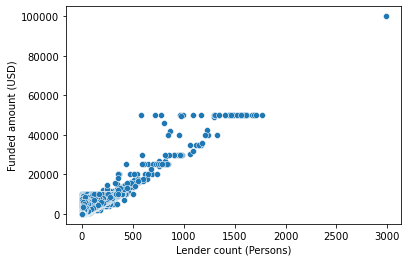

In [22]:
# Visualisieren mit Scatterplot um Ausreißer/Outlier zu identifizieren und Correlation

ax = sns.scatterplot(data=df_abschluss_merge_1, x= 'lender_count', y= 'funded_amount')
ax.set_xlabel('Lender count (Persons)')
ax.set_ylabel('Funded amount (USD)')

##### ERKENNTNIS : 

Ist kein Outlier, weil in Haiti(Code unten) häufig gespendet/investiert wird um Opfern von Katastrophen wie Erdbeben und Flut, zu helfen.
Eine Investition in Landwirtschaft bringt Jobs. 
3000 lender_count, ist für diese Investition realistisch da häufig gespendet/investiert wird für Katastrophen Gebiete.
Der Plot zeigt eine starke positive Correlation zwischen the "funded_amount" und "lender_count". 
Wenn der "lender_count" steigt, steigt der "funded_amount" auch.

Faktoren die dazu führen dass der "lender_count" steigt, somit mehr Dahlehensgebern, und mehr "funded_amount"

In [85]:
# "Country", "sector" und "use" von der punkt mit lender_count > 2500

df_abschluss_merge_1.loc[df_abschluss_merge_1['lender_count']>2500, ('country', 'sector', 'use')]  

,country,sector,use
70499,Haiti,Agriculture,create more than 300 jobs for women and farmer...


##### Speicherplatz

In [24]:
df_abschluss_merge_1.dtypes                           # Datentypen Prüfen

funded_amount         float64
loan_amount           float64
activity               object
sector                 object
use                    object
country_code           object
country                object
region                 object
currency               object
term_in_months        float64
lender_count            int64
borrower_genders       object
repayment_interval     object
dtype: object

In [25]:
df_abschluss_merge_1.sector.nunique()                # checken ob unique values nicht zuviel ist

15

In [26]:
df_abschluss_merge_1.memory_usage(deep=True)            # Speicher schauen fürs Überblick

Index                  5369640
funded_amount          5369640
loan_amount            5369640
activity              46521289
sector                43603755
use                   78857461
country_code          39601095
country               43923974
region                47895732
currency              40272300
term_in_months         5369640
lender_count           5369640
borrower_genders      47174152
repayment_interval    43400106
dtype: int64

In [27]:
# Datentypen der Spalten anpassen

df_abschluss_merge_1['sector'] = df_abschluss_merge_1['sector'].astype('category')
df_abschluss_merge_1['borrower_genders'] = df_abschluss_merge_1['borrower_genders'].astype('category')
df_abschluss_merge_1['region'] = df_abschluss_merge_1['region'].astype('category')
df_abschluss_merge_1['use'] = df_abschluss_merge_1['use'].astype('category')
df_abschluss_merge_1['activity'] = df_abschluss_merge_1['activity'].astype('category')
df_abschluss_merge_1['repayment_interval'] = df_abschluss_merge_1['repayment_interval'].astype('category')
df_abschluss_merge_1['currency'] = df_abschluss_merge_1['currency'].astype('category')
df_abschluss_merge_1['country'] = df_abschluss_merge_1['country'].astype('category')
df_abschluss_merge_1['country_code'] = df_abschluss_merge_1['country_code'].astype('category')


df_abschluss_merge_1.dtypes 

funded_amount          float64
loan_amount            float64
activity              category
sector                category
use                   category
country_code          category
country               category
region                category
currency              category
term_in_months         float64
lender_count             int64
borrower_genders      category
repayment_interval    category
dtype: object

In [28]:
# Check zur Optimierung

df_abschluss_merge_1.memory_usage(deep=True)

Index                  5369640
funded_amount          5369640
loan_amount            5369640
activity               1357871
sector                  672752
use                   72402632
country_code            678442
country                 679029
region                 2911520
currency                677329
term_in_months         5369640
lender_count           5369640
borrower_genders       3539048
repayment_interval      671633
dtype: int64

In [109]:
# Optimierung des Speicherplatzes bei den floats

df_abschluss_merge_1.loc[:,["funded_amount","loan_amount","term_in_months"]
                        ] = df_abschluss_merge_1.loc[:,["funded_amount","loan_amount","term_in_months"]
                                                    ].apply(pd.to_numeric, downcast="float")
df_abschluss_merge_1.dtypes 

funded_amount          float32
loan_amount            float32
activity              category
sector                category
use                   category
country_code          category
country               category
region                category
currency              category
term_in_months           int16
lender_count             int16
borrower_genders      category
repayment_interval    category
dtype: object

In [110]:
# Optimierung des Speicherplatzes bei der integer

df_abschluss_merge_1.loc[:,["lender_count"]] = df_abschluss_merge_1.loc[:,["lender_count"]
                                                                       ].apply(pd.to_numeric, downcast="integer")
df_abschluss_merge_1.dtypes 

funded_amount          float32
loan_amount            float32
activity              category
sector                category
use                   category
country_code          category
country               category
region                category
currency              category
term_in_months           int16
lender_count             int16
borrower_genders      category
repayment_interval    category
dtype: object

In [111]:
# Datentypen der Spalten anpassen von 'floats' zu 'integer'

df_abschluss_merge_1.loc[:,["funded_amount","loan_amount","term_in_months"]
                        ] = df_abschluss_merge_1.loc[:,["funded_amount","loan_amount","term_in_months"]
                                                    ].apply(pd.to_numeric, downcast="integer")
df_abschluss_merge_1.dtypes 

funded_amount            int32
loan_amount              int32
activity              category
sector                category
use                   category
country_code          category
country               category
region                category
currency              category
term_in_months           int16
lender_count             int16
borrower_genders      category
repayment_interval    category
dtype: object

In [32]:
# Check zur Optimierung

df_abschluss_merge_1.memory_usage(deep=True)

Index                  5369640
funded_amount          2684820
loan_amount            2684820
activity               1357871
sector                  672752
use                   72402632
country_code            678442
country                 679029
region                 2911520
currency                677329
term_in_months         1342410
lender_count           1342410
borrower_genders       3539048
repayment_interval      671633
dtype: int64

In [33]:
df_abschluss_merge_1              # check ob Datentypen Anpassung erfolgreich war

,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,term_in_months,lender_count,borrower_genders,repayment_interval
0,300,300,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,12,12,female,irregular
1,575,575,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,11,14,"female, female",irregular
2,150,150,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,43,6,female,bullet
3,200,200,Embroidery,Arts,to purchase an embroidery machine and a variet...,PK,Pakistan,Lahore,PKR,11,8,female,irregular
4,400,400,Milk Sales,Food,to purchase one buffalo.,PK,Pakistan,Abdul Hakeem,PKR,14,16,female,monthly
...,...,...,...,...,...,...,...,...,...,...,...,...,...
671200,0,25,Livestock,Agriculture,"[True, u'para compara: cemento, arenya y ladri...",PY,Paraguay,Concepción,USD,13,0,female,monthly
671201,25,25,Livestock,Agriculture,"[True, u'to start a turducken farm.'] - this l...",KE,Kenya,missing,KES,13,1,female,monthly
671202,0,25,Games,Entertainment,NaN,KE,Kenya,missing,KES,13,0,missing,monthly
671203,0,25,Livestock,Agriculture,"[True, u'to start a turducken farm.'] - this l...",KE,Kenya,missing,KES,13,0,female,monthly


###### EDA

###### Die "Key performance  Indicators " (KPIs) von  letztes jahr finden  

##### Brainstorming: 

- Welche Gruppen der Geldnehmern gibt es ?  
- Welche Gruppen der Geldnehmern hatten die Geldgebern besonders interessiert ?
- Was sind die Gründen die dazu geführt haben, dass die Geldgebern besonders Interesse gezeigt haben ?
- Welche Länder wurden von der Geldgebern bevorzugt ?


In [34]:
# Spalte "borrower_genders" in 4 Gruppen einteilen (female, male, female_groups, other_groups)

# female = 1 Frau
# male = 1 Mann
# female_groups = Gruppen mit mehr als 1 Frau
# other_groups =  Gruppen mit Mischung aus Männer und Frauen, Gruppen mit mehr als ein Mann  

df_gruppen_gender = df_abschluss_merge_1.groupby(['borrower_genders']).agg({'lender_count':'sum'}).reset_index()
df_gruppen_gender

,borrower_genders,lender_count
0,female,6828587.0
1,"female, female",212270.0
2,"female, female, female",327429.0
3,"female, female, female, female",281078.0
4,"female, female, female, female, female",242532.0
...,...,...
11294,"male, male, male, male, male, male, male, male...",250.0
11295,"male, male, male, male, male, male, male, male...",254.0
11296,"male, male, male, male, male, male, male, male...",114.0
11297,"male, male, male, male, male, male, male, male...",167.0


In [36]:
# lender_count von der Einteilungen, female und male 

df_gruppen_gender.loc[(df_gruppen_gender.loc[:, 'borrower_genders'].isin(['male', 'female'])),: ]  

,borrower_genders,lender_count
0,female,6828587.0
6904,male,2987541.0


In [37]:
# lender_count der Einteilung, female_groups

lender_count_female_groups = df_gruppen_gender[1:50].lender_count.sum()
lender_count_female_groups

2149464.0

In [38]:
# lender_count der Einteilung, other_groups

lender_count_other_groups = [df_gruppen_gender[51:6903].lender_count.sum()] + [df_gruppen_gender[6905:].lender_count.sum()]
lender_count_other_groups =sum(lender_count_other_groups)
lender_count_other_groups

1855083.0

In [39]:
# Zwei listen, der 4 Gruppen und die lender_counts
# Listen in ein Dataframe umwandeln

list_1 = ['female', 'male', 'female_groups', 'other_groups']
list_2 = [6828587.0, 2987541.0, 2149464.0, 1741458.0]
df_lender_count = pd.DataFrame(list(zip(list_1,list_2)), columns= ['borrowers_gender_groups', 'lender_count_sum'])
df_lender_count

,borrowers_gender_groups,lender_count_sum
0,female,6828587.0
1,male,2987541.0
2,female_groups,2149464.0
3,other_groups,1741458.0


In [40]:
# Datentypen anschauen 

df_lender_count.dtypes

borrowers_gender_groups     object
lender_count_sum           float64
dtype: object

In [41]:
# Speicher Daten anschauen

df_lender_count.memory_usage(deep=True)              # Der Datentyp "objekt" wurde nicht umgewandelt, da es bei 439 liegt

Index                      128
borrowers_gender_groups    263
lender_count_sum            32
dtype: int64

In [42]:
# Datentyp optimieren, float64 auf float32

df_lender_count.loc[:,["lender_count_sum"]] = df_lender_count.loc[:,["lender_count_sum"]
                                                                 ].apply(pd.to_numeric, downcast="float")
df_lender_count.dtypes 

borrowers_gender_groups     object
lender_count_sum           float32
dtype: object

In [43]:
# Datentyp anpassen, von float zu integer

df_lender_count.loc[:,["lender_count_sum"]] = df_lender_count.loc[:,["lender_count_sum"]
                                                                 ].apply(pd.to_numeric, downcast="integer")
df_lender_count.dtypes 

borrowers_gender_groups    object
lender_count_sum            int32
dtype: object

In [44]:
df_lender_count.memory_usage(deep=True)  # Speicher anschauen

Index                      128
borrowers_gender_groups    263
lender_count_sum            16
dtype: int64

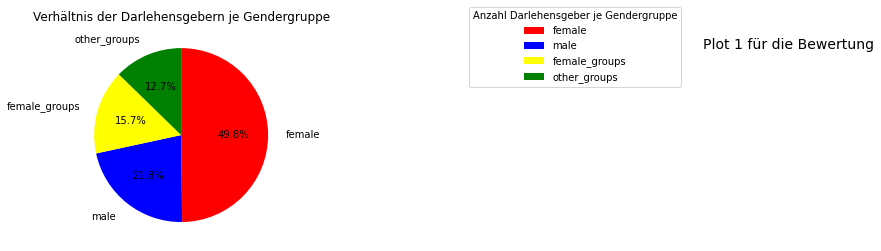

In [45]:
# Dataframe (df_lender_count) visualisieren mit Pie Chart


formatierung = '%1.1f%%'
color = ['red', 'blue', 'yellow', 'green']                                
label = ['female', 'male', 'female_groups', 'other_groups']

# Figuren und achsenobjekt erstellen

fig, ax = plt.subplots() 

# Pie chart erstellen

ax.pie(x=df_lender_count['lender_count_sum'],        
       labels=label,             
       colors=color,            
       autopct=formatierung,    
       pctdistance=0.6,         
       labeldistance=1.2,        
       startangle=90.0,          
       counterclock=False,      
                    
      )

ax.set_title('Verhältnis der Darlehensgebern je Gendergruppe')
ax.legend(title= 'Anzahl Darlehensgeber je Gendergruppe', loc='lower left', bbox_to_anchor=(1.8, 0.7), ncol=1)
plt.text(6, 1, f'Plot 1 für die Bewertung',  fontsize= 14)
plt.show()




fig = ax.get_figure()
fig.savefig("Verhältnis der Darlehensgebern je Gendergruppe")


##### Erkenntnis

##### Deskriptiv:

1) Die hälfte der Geldgebern haben sich für Projekte entschieden die von eine Frau initiert wurden.
Deutlich mehr als bei Projekte die von ein Mann initiert wurden.

2) Projekte die von Frauen Gruppen kam, waren ebenfalls interessanter für die Geldgebern als die von Männer Gruppen.

3) 


##### Conclusion:

An diese Stelle, zeigt uns die Daten dass Einzelprojekte kommen bei der Geldgebern gut an.
(Brainstorming: Geringe Risiko da eine Person statt mehrere Personen und erhöhte Risikofläche?)

Die Daten zeigen uns auch dass die Projekte von Frauen Gruppen kamen gut an, aber wir müssen tiefer greifen und rausfinden ob der Vertrauen der Geldgebern stieg/fiel mit wachsende Größe der Gruppe. Siehe unten.

Eine Mischung aus Männer und Frauen hat auch nicht viel vertrauen bekommen bei den Geldgebern, sowie reine Männer Gruppen.




In [106]:
# Dataframe vorbereiten für die Visualisierung der Frauen Gruppe

df_female_groups = df_gruppen_gender[9:13].reset_index()
df_female_groups

,index,borrower_genders,lender_count
0,9,"female, female, female, female, female, female...",113228.0
1,10,"female, female, female, female, female, female...",47185.0
2,11,"female, female, female, female, female, female...",30747.0
3,12,"female, female, female, female, female, female...",25573.0


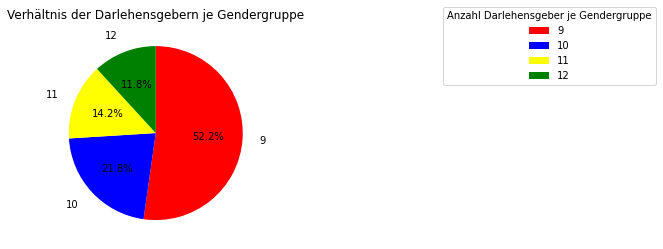

In [48]:
# Dataframe (df_female_groups) visualisieren mit Pie Chart


formatierung = '%1.1f%%'
color = ['red', 'blue', 'yellow', 'green',]                  # Der Label folgt über die Indices 9,10,11,12             
label = ['9', '10', '11', '12']

# figuren und achsenobjekt erstellen

fig, ax = plt.subplots() 

# Pie chart erstellen

ax.pie(x=df_female_groups['lender_count'],        
       labels=label,             
       colors=color,            
       autopct=formatierung,    
       pctdistance=0.6,         
       labeldistance=1.2,        
       startangle=90.0,          
       counterclock=False)

ax.set_title('Verhältnis der Darlehensgebern je Gendergruppe')
ax.legend(title= 'Anzahl Darlehensgeber je Gendergruppe', loc='lower left', bbox_to_anchor=(1.8, 0.7), ncol=1,)
plt.show()

fig = ax.get_figure()
fig.savefig("Verhältnis der Darlehensgebern je Gendergruppe")

##### Erkenntnis:

Die Geldgebern haben sich ehe für Projekte mit einzel Personen entschieden, aber bei mehr als 10 personen fiel die interesse jedoch ab. Obwohl es sich um reine Frauen Gruppe handelt.

Jetzt schauen wir noch tiefer, um anderen mustern zu finden die beigetragen haben dass die Gelgebern ehe für Projekte die von einzel Frauen initiert wurden entschieden haben.
Dafür müssen wir wissen in welchen Oberkategory sind die Projekte die von einzel Fauen initiert wurden.

In [49]:
# Dataframe erstellen durch groupby und die Summe der "lender_count" füe die sectors

df_sector = df_abschluss_merge_1.groupby(['borrower_genders', 'sector']).agg({'lender_count':'sum'}).reset_index()
df_sector

,borrower_genders,sector,lender_count
0,female,Agriculture,1686675.0
1,female,Arts,163312.0
2,female,Clothing,406091.0
3,female,Construction,47124.0
4,female,Education,503480.0
...,...,...,...
169480,missing,Personal Use,2022.0
169481,missing,Retail,19512.0
169482,missing,Services,14915.0
169483,missing,Transportation,1498.0


In [50]:
# Slicing um Einzelfrauen zu haben

df_sector_female = df_sector[0:15]
df_sector_female

,borrower_genders,sector,lender_count
0,female,Agriculture,1686675.0
1,female,Arts,163312.0
2,female,Clothing,406091.0
3,female,Construction,47124.0
4,female,Education,503480.0
5,female,Entertainment,10832.0
6,female,Food,1322254.0
7,female,Health,134098.0
8,female,Housing,402312.0
9,female,Manufacturing,49237.0


In [51]:
#Sort Dataframe 

df1_sector_female_sorted = df_sector_female.sort_values(by='sector', ascending=False)
df1_sector_female_sorted

,borrower_genders,sector,lender_count
14,female,Wholesale,8744.0
13,female,Transportation,113200.0
12,female,Services,613383.0
11,female,Retail,1241099.0
10,female,Personal Use,126746.0
9,female,Manufacturing,49237.0
8,female,Housing,402312.0
7,female,Health,134098.0
6,female,Food,1322254.0
5,female,Entertainment,10832.0


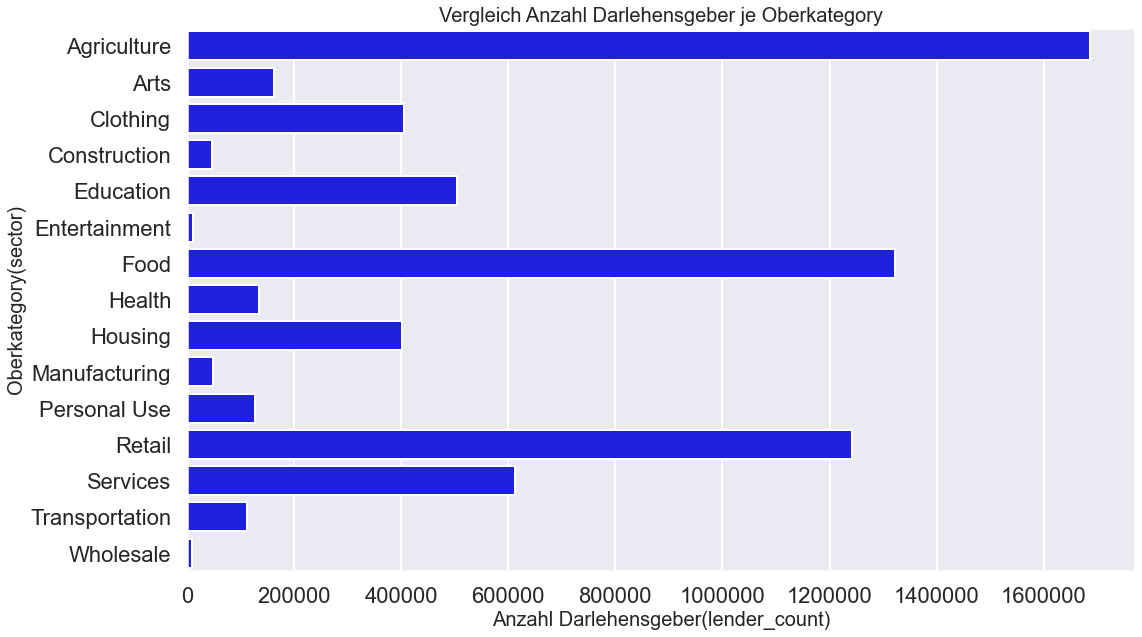

In [53]:
# Visualisierung der Dataframe mit Bar Chart

color_list = ['blue']
current_palette = color_list
ax=sns.barplot(x='lender_count', y='sector', data=df1_sector_female_sorted, palette=current_palette)
ax.set_ylabel('Oberkategory(sector)', fontsize=20)
ax.set_xlabel('Anzahl Darlehensgeber(lender_count)', fontsize=20)
ax.set_title('Vergleich Anzahl Darlehensgeber je Oberkategory', fontsize=20)
ax.figure.set_size_inches(17, 10)
sns.set_context('poster')
sns.set_style('darkgrid')
plt.ticklabel_format(style='plain', axis='x')

##### Plot 2 für die Bewertung  

##### Erkenntnis:

Die bevorzugte Oberkategorien sind in Agriculture, Food, Retail, Services.
Agriculture and Food sind Bereiche die oft mit Frauen im Verbindung steht in viele Kulturen.
Die Daten sagen uns dass einzel Frauen oft stationiert sind und können Retail (kleine Einzelunternehmen) betreiben.
Oft haben Hausfrauen die gelegenheit zur Retail.
Einige Geschäftsideen können Überschneidungen zu anderen Bereiche haben. Beispile dazu Food Catering Services.

Als nächstes schaue ich die Oberkategory Agriculture genauer an (Visualisierung mit Scatter Plot).
Die Rückzahlungsmodalitäten/rythmus und Dauer über den der Kredit ausgezahlt werden muss, sind Faktoren die auch zu diese Entscheidung beigetragen haben könnte.






In [112]:
# Dataframe für der Scatter Plot aufbereiten
# Projekte in Agriculture sector, initiert von einzel Frauen, dazu die lender_counts, repayment_interval und terms_in_months

df_sector_term = df_abschluss_merge_1.loc[(df_abschluss_merge_1.loc[:, 'borrower_genders']=='female') & 
                                          (df_abschluss_merge_1.loc[:, 'sector']=='Agriculture'), 
                                          ['sector', 'lender_count', 'repayment_interval', 'term_in_months']].reset_index()
df_sector_term

,index,sector,lender_count,repayment_interval,term_in_months
0,6,Agriculture,8,bullet,43
1,14,Agriculture,7,bullet,43
2,25,Agriculture,9,bullet,43
3,28,Agriculture,5,bullet,43
4,29,Agriculture,10,bullet,43
...,...,...,...,...,...
99600,671199,Agriculture,0,monthly,13
99601,671200,Agriculture,0,monthly,13
99602,671201,Agriculture,1,monthly,13
99603,671203,Agriculture,0,monthly,13


[Text(0.5, 0, 'Kredit Auszahlungsdauer in Monaten'),
 Text(0, 0.5, 'Anzahl Darlehensgeber(lender_count)')]

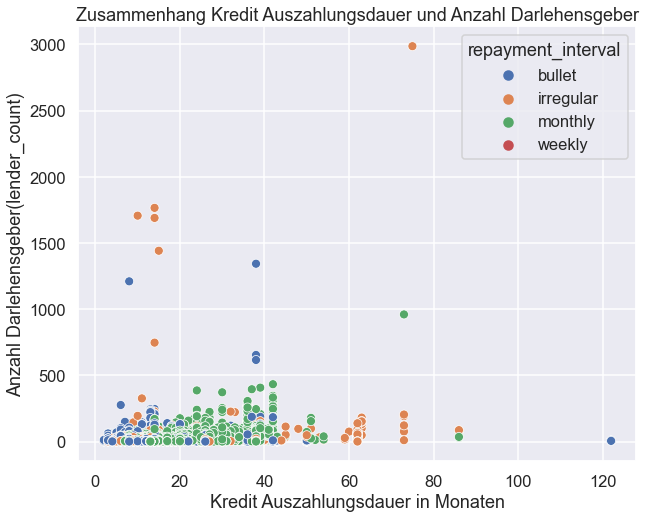

In [83]:
# Visualisieren mit Scatter Plot

plt.figure(figsize=(10, 8))
a = sns.scatterplot(x='term_in_months',
                y='lender_count',
                data=df_sector_term,
                hue='repayment_interval',             
                palette='deep')         
                          
sns.set_context('talk')
type(a)
a.set_title('Zusammenhang Kredit Auszahlungsdauer und Anzahl Darlehensgeber')
a.set(xlabel='Kredit Auszahlungsdauer in Monaten', ylabel='Anzahl Darlehensgeber(lender_count)')
       

##### Plot 3 für die Bewertung

##### Erkenntnis:

Aus der Plot sieht man dass keine Projekte mit wöchenlichen Rückzahlungsmodalität, wurde für Agriculture angeboten.
Bei der Kombination irregular als Rückzahlungsmodalität  und Kreditauszahlungsdauer unter 20 Monaten, waren relative viele Geldgebern interessiert, da der Kreditnehmer braucht etwas Zeit um in Agriculture Umsatz zu generieren.
Wenn er aber seine Ernte hat, kann er zahlen.
Genauso braucht der Kreditnehmer relative schnelle Auszahlung damit er zeitlich investiert.
Die Kombination.

Jetzt können wir schauen Welche Länder besonders interessant für Agriculture waren, für die Geldgebern.


In [113]:
# Dataframe zeigt die Länder mit der höchste "lender_count" bei Agriculture Projekte initiert von einzel Frauen.

df_sector_country = df_abschluss_merge_1.loc[(df_abschluss_merge_1.loc[:, 'borrower_genders']=='female') & 
                                             (df_abschluss_merge_1.loc[:, 'sector']=='Agriculture') & 
                                             (df_abschluss_merge_1.loc[:, 'lender_count']>=600), 
                                             ['sector', 'lender_count', 'country']].reset_index()
df_sector_country

,index,sector,lender_count,country
0,70499,Agriculture,2986,Haiti
1,163727,Agriculture,1343,Kenya
2,163872,Agriculture,654,Kenya
3,164106,Agriculture,616,Kenya
4,490589,Agriculture,960,Brazil
5,494470,Agriculture,1441,Kenya
6,509048,Agriculture,1765,Tanzania
7,543706,Agriculture,747,Philippines
8,563324,Agriculture,1210,Peru
9,565733,Agriculture,1689,Ecuador


##### Conclusion:

Aus der EDA, mögliche Indikatoren:

- Projekte von Einzelunternehmer werden bevorzugt
- Projekte initiert von Einzelunternehmerin Frau
- Projekte initiert von Einzelunternehmer Mann
- Projekte initiert von Gruppen reine Frauen bis zu 10 Personen
- Folgenden Oberkategorien (Agriculture, Food, Services, Retail)
- Rückzahlungsmodalitäten für Agriculture Projekte, irregular.
- Kredit Auszahlungsdauer für Agriculture Projekte, < 20 Monaten

Diese mögliche Indikatoren aus der EDA führen dazu dass der Anzahl an Darlehengebern steigt.
Der Anzahl an Darlehensgebern hat eine stark positive correlation mit der "funded_amount".
somit würde der "funded_amount" steigen sowie unseren Provision.